# Perkenalan

*   Ardi Yuliantoro, Darry Ramadhan Abdussalam, Fajrul Faiz
*   PYTN Batch 4
*   Final Projek 2

Dataset merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku.

<b>Attribute Information:</b>
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

Dataset berasal dari Kaggle <a href="https://www.kaggle.com/datasets/arjunbhasin2013/ccdata">(credit card data)</a>

# Import Pustaka

In [ ]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pickle

# Data Loading

In [ ]:
# Load Data
df_ori = pd.read_csv("https://raw.githubusercontent.com/ardiy07/dataset/main/CC%20GENERAL.csv")
# Copy data ori
df = df_ori.copy()
# Tampilkan 5 data teratas
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Dari informasi yang didapatkan, data berjumlah 8950 dengan 18 columns.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Cek data Nan
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari hasil tersebut, terdapat dua kolom yang memiliki nilai Nan, yaitu pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS

# Data Cleaning

In [ ]:
# Ganti Nan pada Credit Limit dengan nilai mean
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [ ]:
# Ganti Nan pada MINIMUM_PAYMENTS dengan nilai mean
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [ ]:
# Cek Data Duplikat
df.duplicated().sum()

0

In [ ]:
# Mendrop kolom CUST_ID, hal tersebut karena kolom tersebut tidak memiliki arti
df.drop(columns=['CUST_ID'], inplace=True)

# Exploration Data Analysis (EDA)

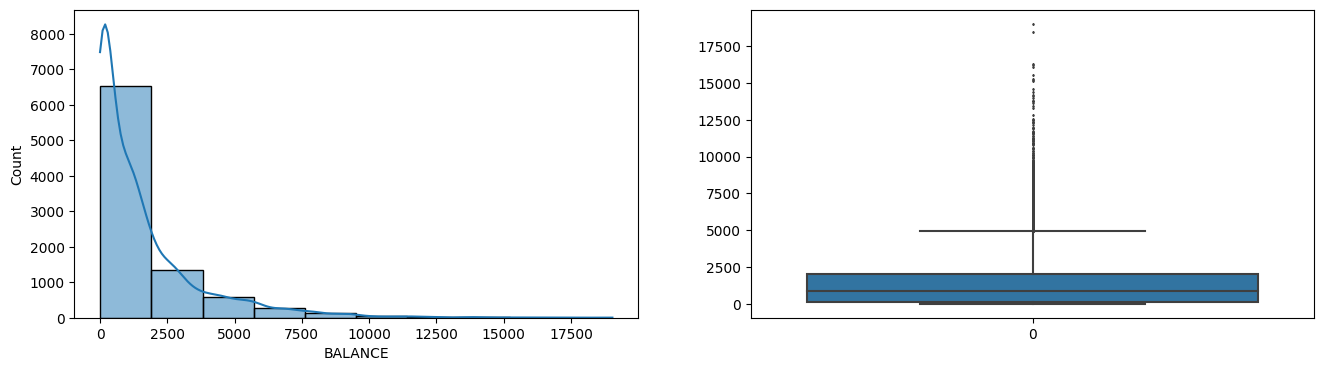

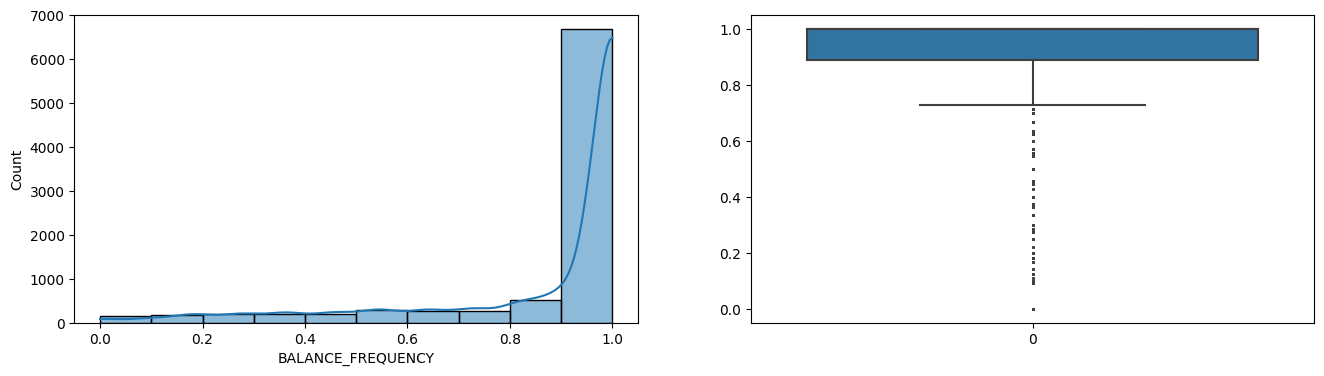

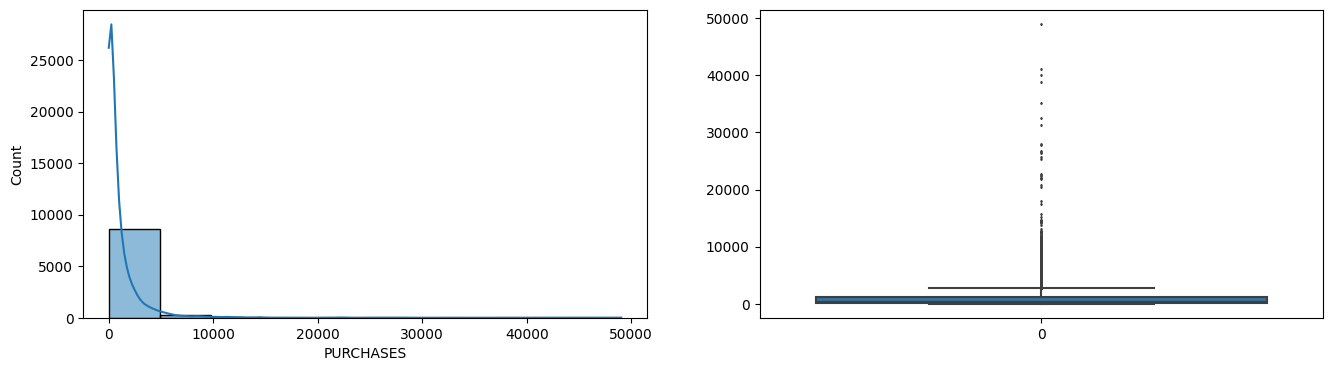

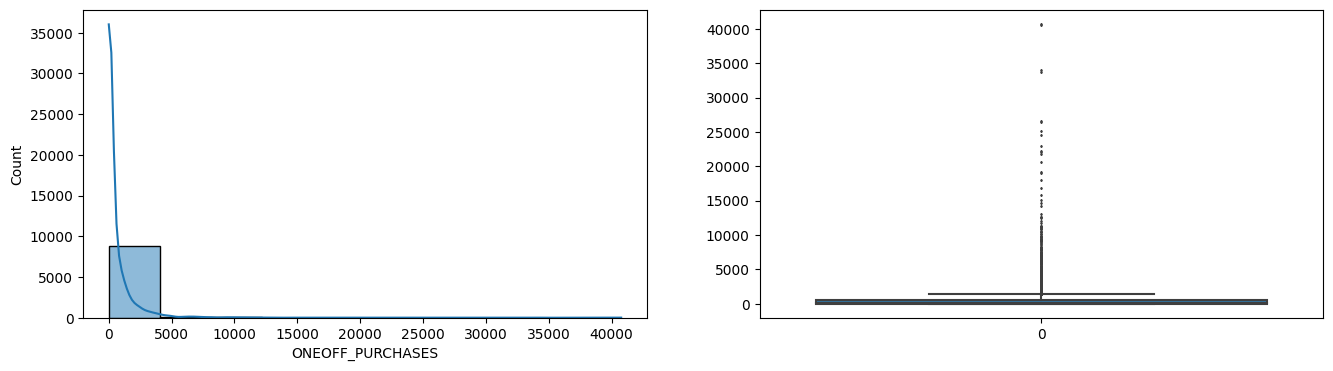

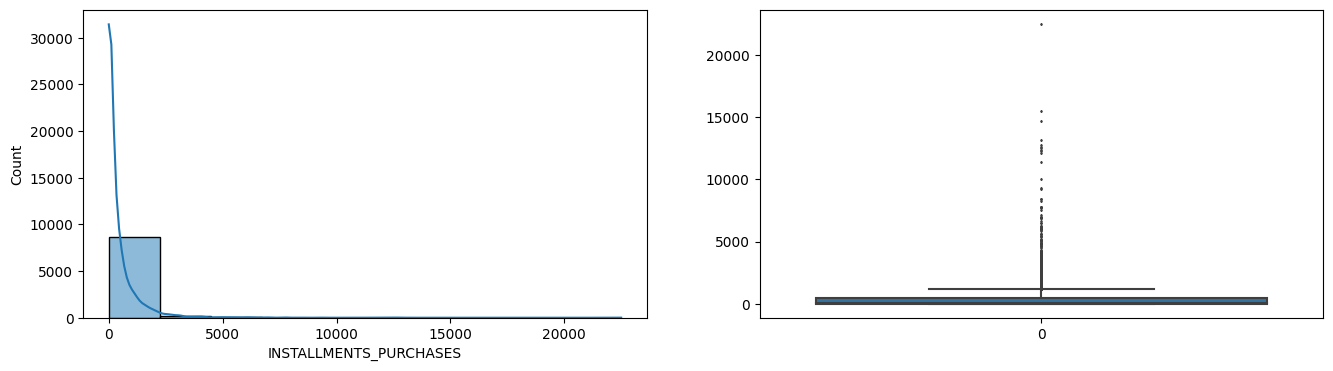

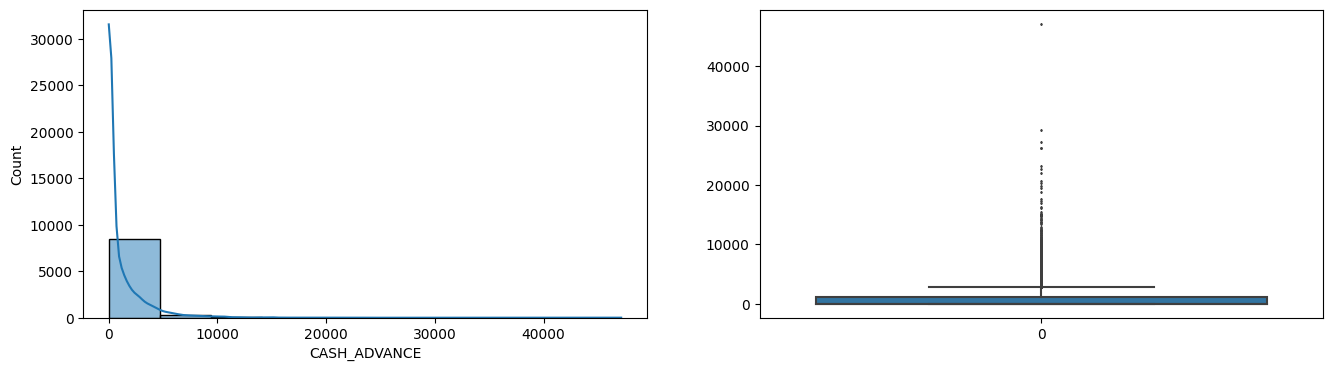

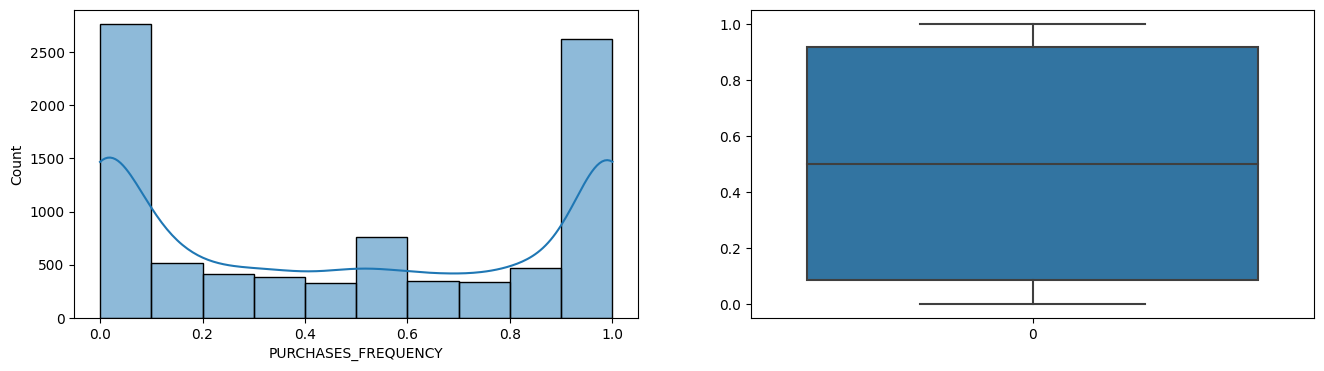

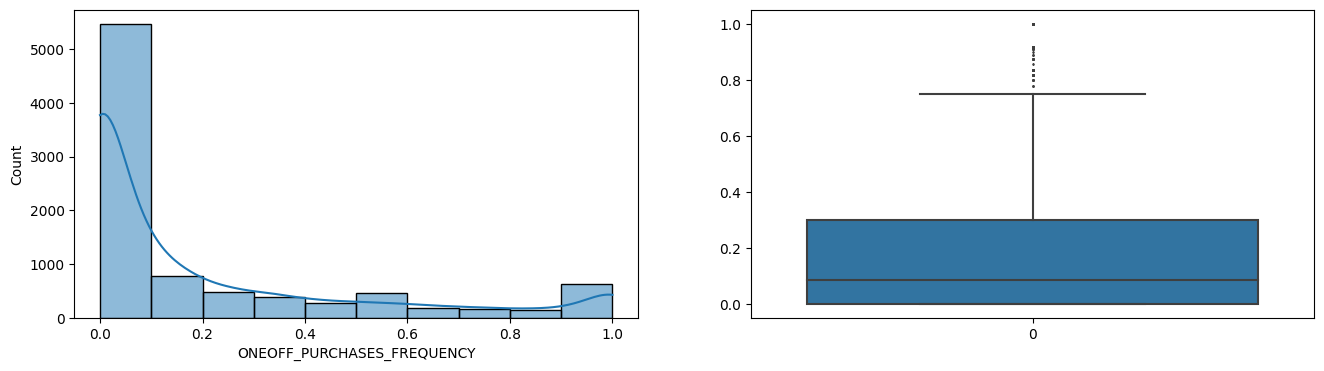

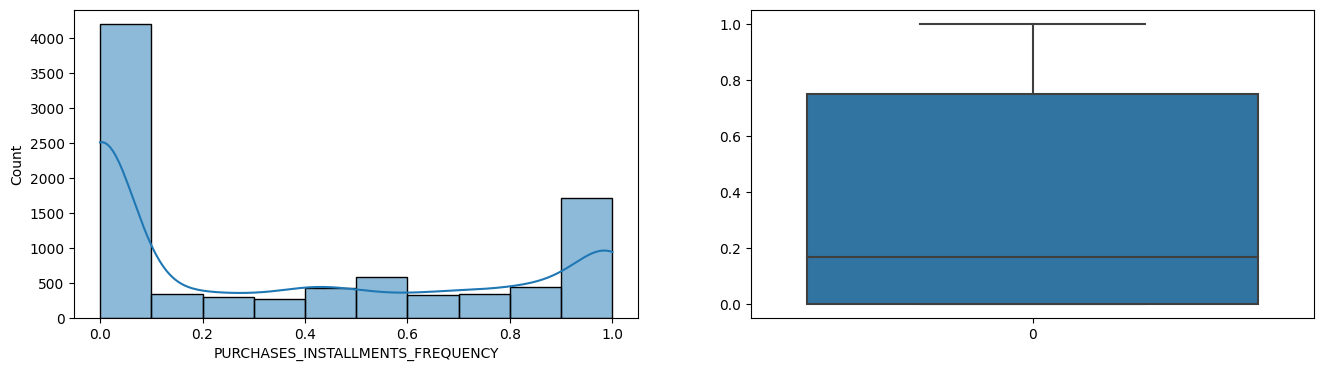

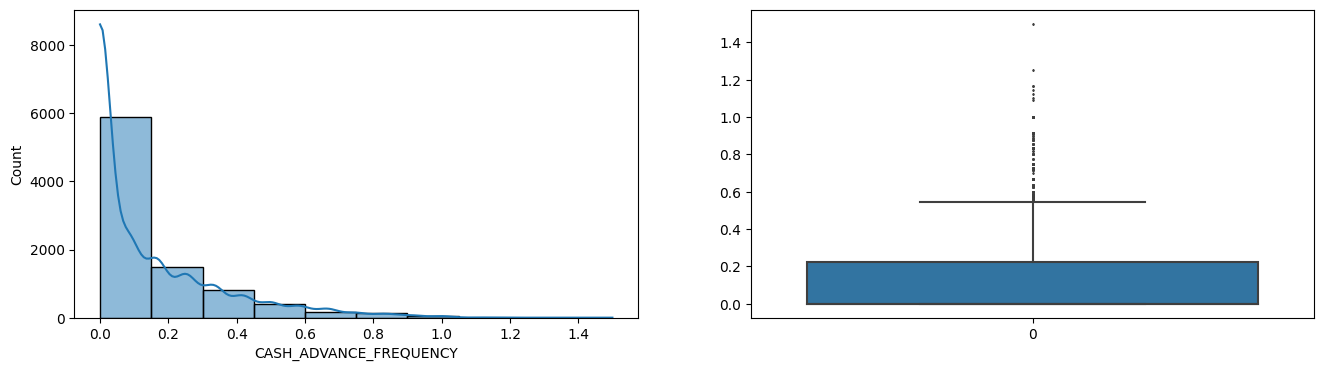

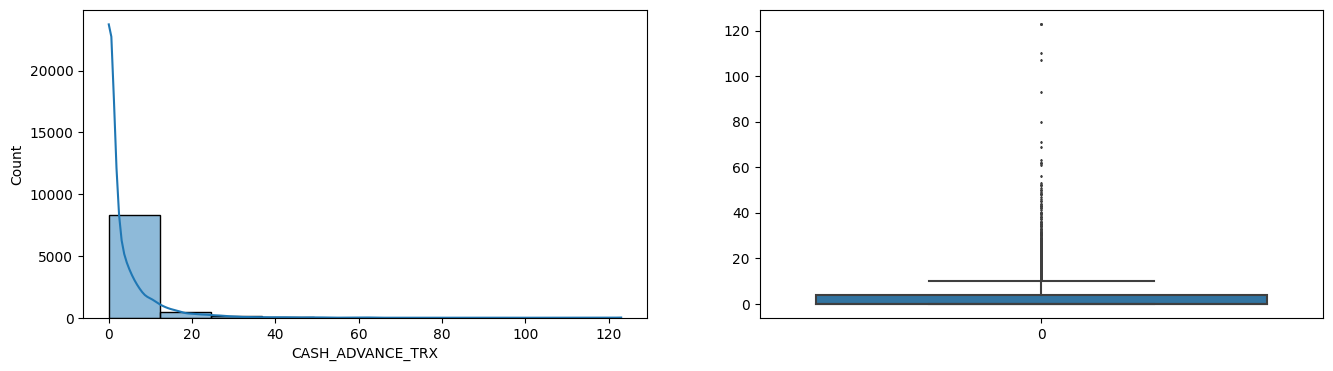

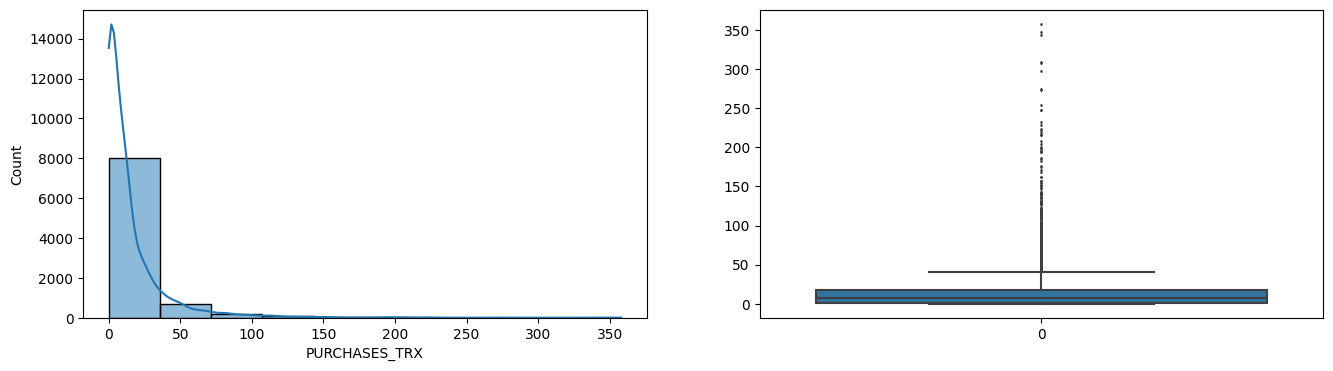

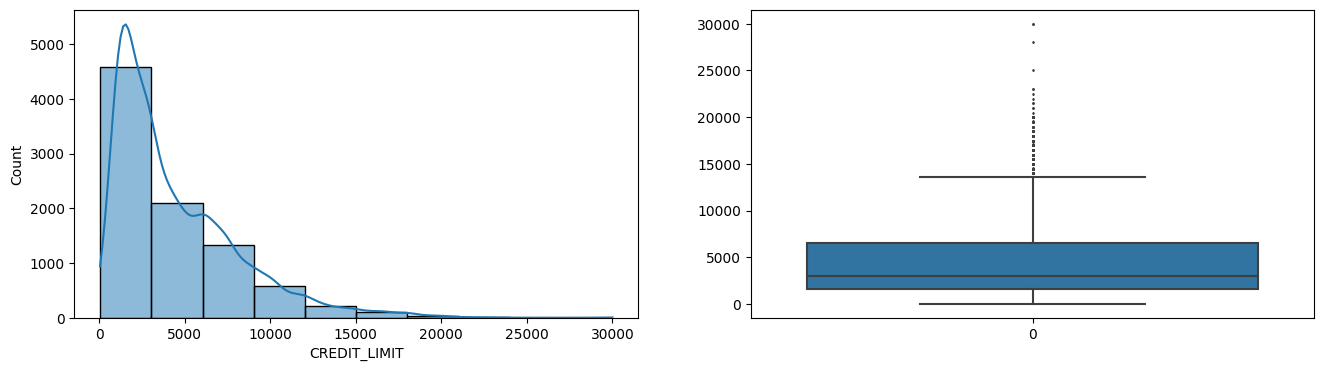

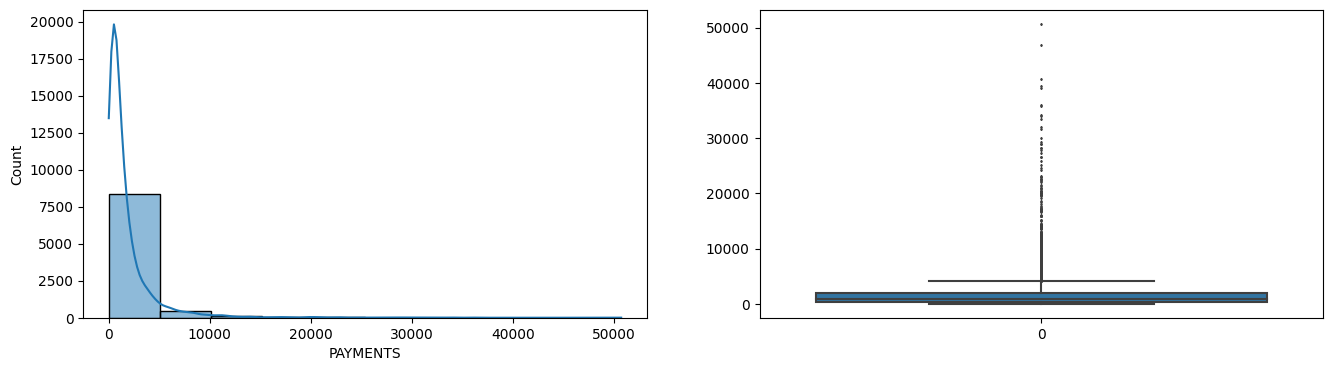

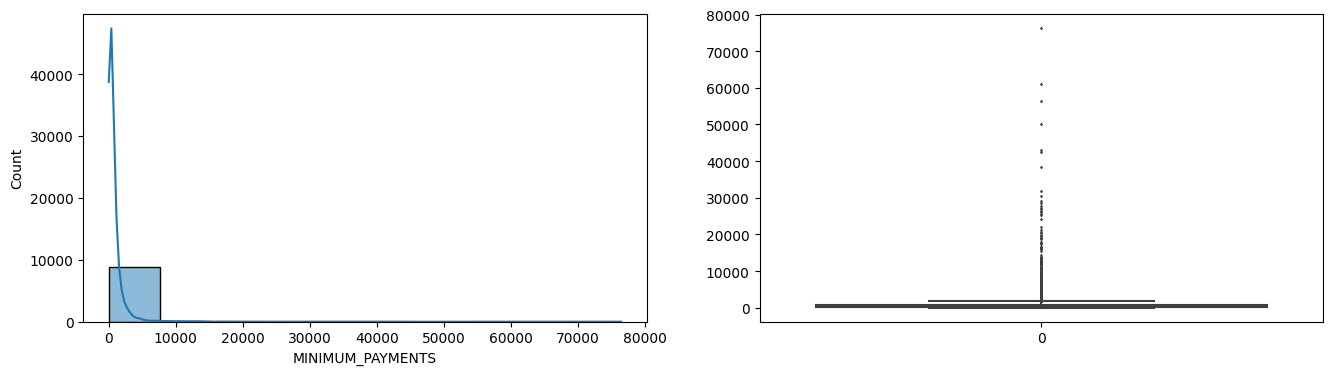

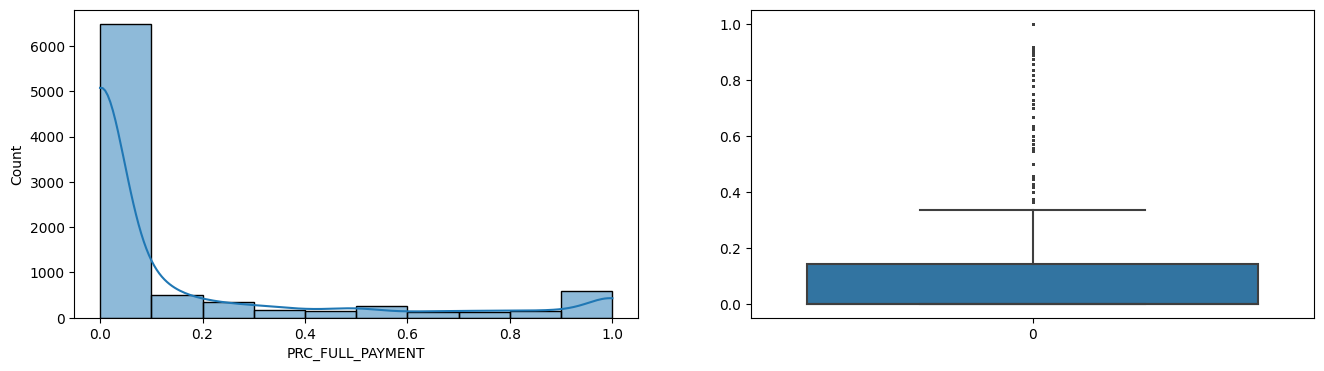

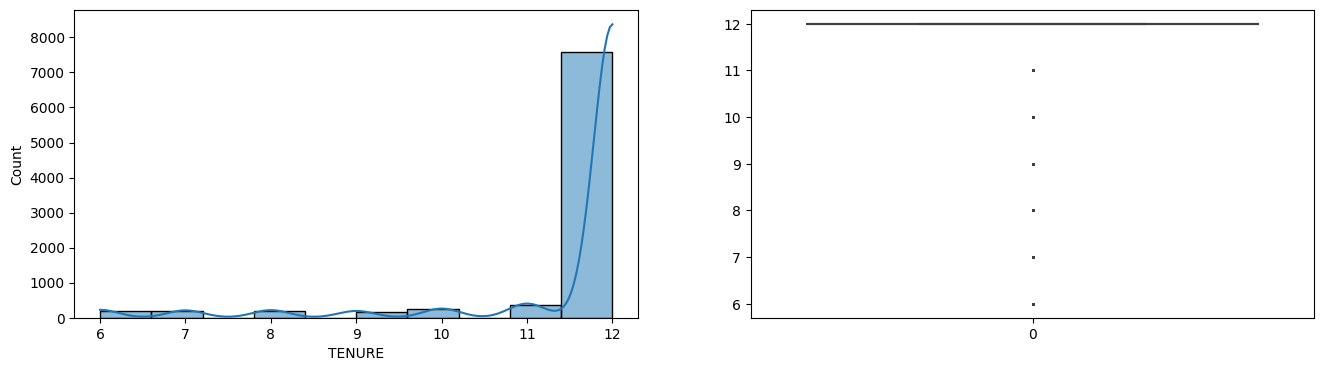

In [ ]:
for col in df.columns:
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4))

    sns.histplot(df[col], bins=10, kde=True,  ax=ax[0])

    sns.boxplot(df[col], fliersize=1, ax=ax[1])

dari hasil plot tersebut,
dsitribusi data terlihat hampir semua distribusi semua fitur distribusi highly right - skew, sementara jika melihat pada boxplot beberapa yang ada, masih terdapat outlier.

Selanjutnya dikarena kan dataset kita mengenai nasabah sehingga kita perlu mengetahui perilaku nasabah dapat ditentukan dengan perilaku pada kolom tenure dalam dataset kita

In [ ]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6])

<Axes: title={'center': 'Working Tenure Nasabahh'}>

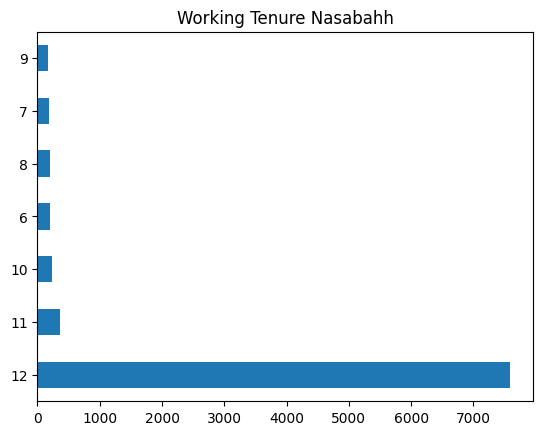

In [ ]:
df['TENURE'].value_counts().plot(kind ='barh', title = "Working Tenure Nasabahh")

Dari grafik barchart diatas dapat kita simpulkan bahwa ketika nasabah menggunakan kartu kredit, sebagian besar nasabah kartu kredit lebih memilih opsi untuk 12 bulan hal ini dapat diketahui bahwa nasabah lebih cenderung membayar kredit dalam jangka waktu panjang ( 1tahun ) dengan konsekuensi tingkat bungga yang lebih tinggi

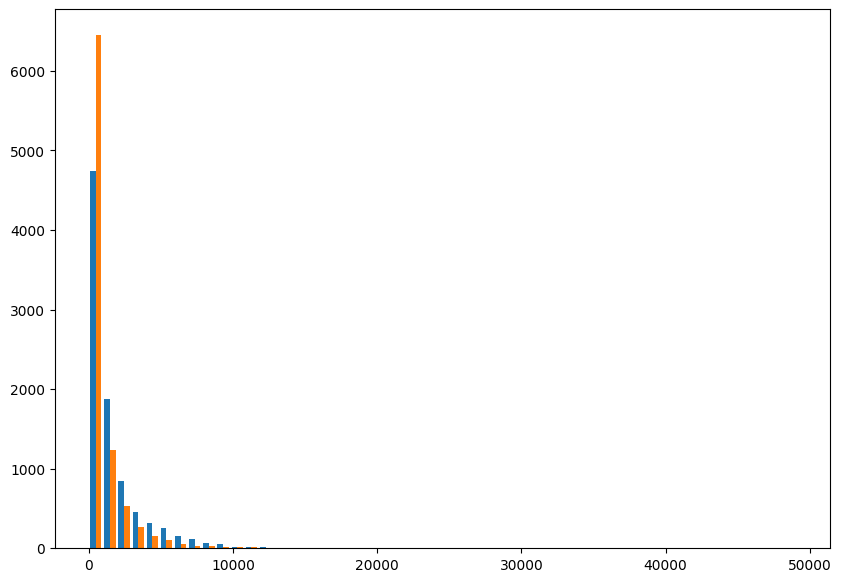

In [ ]:
BALANCE = df[['BALANCE','PURCHASES']]
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(BALANCE, bins = 50)
plt.show()

grafik diatas merupakan histogram antara kolom "balance" dengan "purchase" dari histogram diatas dapat  disimpulkan bahwa banyak nasabah dengan dengan credit card 0 hal ini selaras dengan kolom purchase yang menunjukkan histogram yang hampir sama dengan feature balance, hal ini bisa kita asumsikan nasabah sering membuat balance akun tetap rendah sehingga mereka mendapat batas kredit yang tinggi.

# Data Preprocessing

## 1. Preprocessing pada korelasi data

<Axes: >

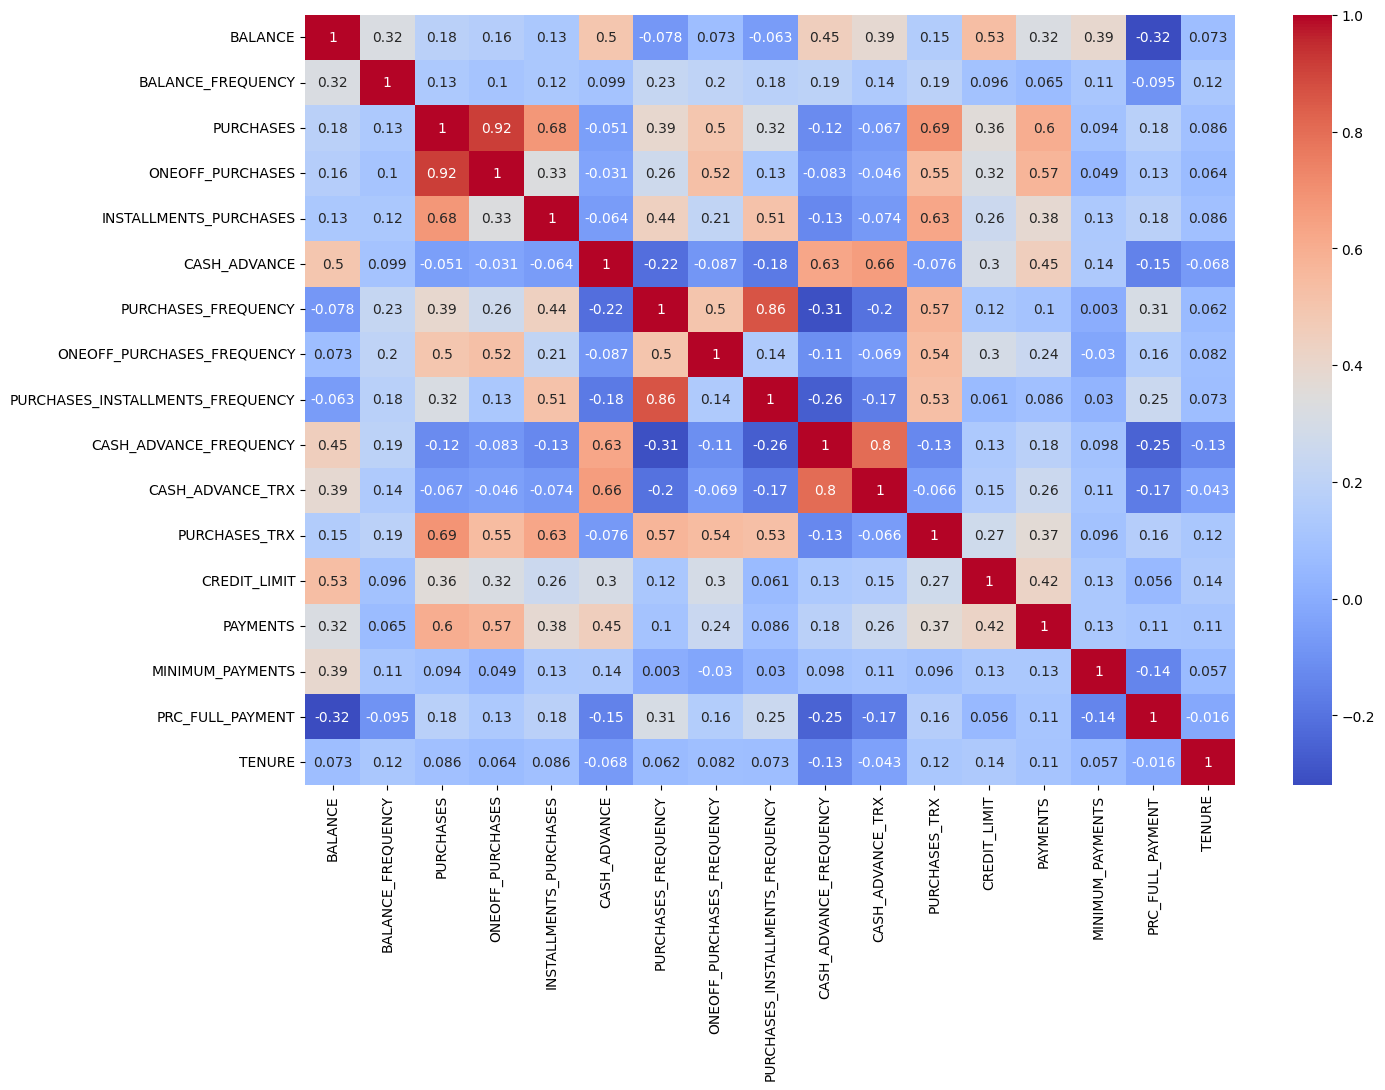

In [ ]:
# Cek korelasi antar fitur
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Pada hasil korelasi tersebut, kita dpat melihat bahwa terdapat beberapa kolom yang memiliki korelasi yang cukup tinggi.

## Seleksi fitur

In [ ]:
# Hapus fitur yang memiliki korelasi yang cukup tinggi
df.drop(['PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'], axis=1, inplace=True)

Penghapusan fitur dilkukan berdasarkan korelasi yang tinggi. Pengahpusan dilakukan dengan menghapus kolom yang memiliki korelasi tinggi pada sumbu X.

## Menangani Outlier

In [ ]:
# Menghandle outlier dengan membatasi nilai maksimum dan menghapus outlier serta menggantinya.

for col in df.columns:
  q1 = df[col].quantile(0.25) # Nilai q1 per colom
  q3 = df[col].quantile(0.75) # Nilai q2 per colom
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  for j in df[col]:
    if j > Upper_tail: # Cek batas atas quartil {q3)
      df[col] = df[col].replace(j, Upper_tail) # Mengganti quartil di batas atas dengan q3
    elif j < Lower_tail: # Cek batas bawah quartil (q1)
      df[col] = df[col].replace(j, Lower_tail)  # Mengganti quartil di batas bawah dengan q1
    else:
        continue

## Standardisasi

In [ ]:
# Panggil standartscaler
scaler = StandardScaler()
# Lakukan standard scaler pada data
data_scaled = scaler.fit_transform(df)

Standar Sclaer dilakukan karena K-Means merupakan algoritme yang bergantung pada jarak antar data (distance-based algorithm), perbedaan magnitudo ini dapat menghasilkan kesulitan.

# Modeling

In [ ]:
# Load kmenas dengan k=2
kmeans = KMeans(n_clusters = 2, init='k-means++', random_state=0)
# fit data scaled
kmeans.fit(data_scaled)
# Lakukan prediksi
pred = kmeans.predict(data_scaled)

In [ ]:
# Hitung masing - masing dari cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    6400
1    2550
Name: cluster, dtype: int64

Pada data tersebut didapatkan bahwa jumlah data yang termasuk cluster sebanyak 6399 data dan cluster 2 sebanyak 2551 data.

In [ ]:
# Cek nilai nilai inersia
kmeans.inertia_

90030.85581660192

Pada k=2, Kita mendapatkan nilai inersia 90030.

# Evaluasi

Pada data tersebut, kita tidak dapat mengetahui berapa nilai n_cluster/K yang memiliki nilai bagus, sehingga kita dapat menggunakan elbow curve untuk menentukan jumlah optimal cluster.

Text(0, 0.5, 'Inertia')

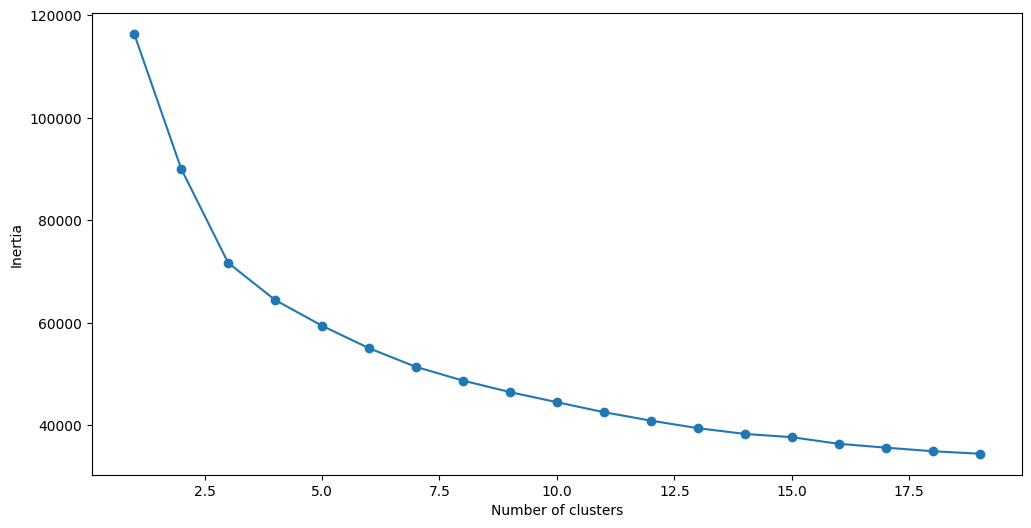

In [ ]:
SSE = [] #Buat variabel baru
for cluster in range(1,20): #Lakukan clustering antara 2 - 19
  kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=0) # Lakukan kmeans dengan nilai n_cluster 2 - 19
  kmeans.fit(data_scaled) #lakuka fit pada data_scaled
  SSE.append(kmeans.inertia_) # lakakukan penghitungan nilai nilai inersia

frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE}) # Tampung hasil ke dalam dataframe

# Tampilkan hasilnya dalam bentuk plot
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Pada elbow curve di atas, kita dapat memilih sejumlah cluster antara 3 hingga 5. Kita tetapkan jumlah cluster sebagai 3 dan latih model

In [ ]:
# Load kmenas dengan k=3
kmeans = KMeans(n_clusters=3, init='k-means++')
# fit data scaled
kmeans.fit(data_scaled)
# Lakukan prediksi
pred = kmeans.predict(data_scaled)

In [ ]:
# Hitung masing - masing dari cluster
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    4937
1    2172
2    1841
Name: cluster, dtype: int64

Pada data tersebut didapatkan bahwa jumlah data yang termasuk cluster 1 sebanyak 4932 data, cluster 2 sebanyak 2174 data dan cluster 3 sebanyak 1844.

In [ ]:
# Cek nilai nilai inersia
kmeans.inertia_

71676.49118816464

Pada k=3, Kita mendapatkan nilai inersia 71676.

## Ekspor Model

In [ ]:
clf_filename = 'credit_card_data_clustering.pkl' #nama file model
pickle.dump(kmeans, open(clf_filename, 'wb')) #Ekport model

# Inferencing

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.0000,95.4,0.000000,0.000000,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0000,0.0,2784.552848,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.1700,0.0,0.000000,0.750000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.722223,1443.5125,0.0,205.788017,0.083333,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.0000,0.0,0.000000,0.083333,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Load model
load_model = pickle.load(open('/content/credit_card_data_clustering.pkl', 'rb'))

In [ ]:
# Lakukan Prediksi
load_model.predict([[40.900749,	0.818182,	0.0000,	95.4,	0.000000,	0.000000,	0.000000,	0,	2,	1000.0,	201.802084,	139.509787, 0]])

ValueError: ignored

Pada percobaan prediksi tersebut, data tersbut termasuk ke dalam cluster ke tiga

# Kesimpulan

1. Dalam dataset tersebut, memiliki perbedaan magnitudo yang cukup tinggi. Sehingga hal tersebut mempengaruhi clustering.
2. Dari hasil elbow curve, Kluster yang optimal adalah antara 3 - 5. Namun pada prediksi cluster ini, Kluster yang di ambil adalah 3.
3. Pada hasil akhir dengan k=3, didapatkan bahwa jumlah data yang termasuk cluster 1 sebanyak 4932 data, cluster 2 sebanyak 2174 data dan cluster 3 sebanyak 1844.
4. Nilai inersia pada k=3 tersebut adalah 71676.62018195275